<a href="https://colab.research.google.com/github/dklpp/tf-developer/blob/main/C2_W1_Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and Inspect the Dataset

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-11-04 13:01:42--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   140MB/s    in 0.5s    

2023-11-04 13:01:43 (140 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [5]:
import os

base_dir = 'cats_and_dogs_filtered'

print('Contents of base directory:')
print(os.listdir(base_dir))

print('Contents of train directory:')
print(os.listdir(f'{base_dir}/train'))

print('Contents of validation directory:')
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['validation', 'vectorize.py', 'train']
Contents of train directory:
['dogs', 'cats']
Contents of validation directory:
['dogs', 'cats']


In [7]:
?os.listdir

In [10]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [13]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir =  os.path.join(validation_dir, 'dogs')

In [14]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.78.jpg', 'cat.990.jpg', 'cat.664.jpg', 'cat.116.jpg', 'cat.564.jpg', 'cat.948.jpg', 'cat.311.jpg', 'cat.979.jpg', 'cat.512.jpg', 'cat.570.jpg']
['dog.708.jpg', 'dog.986.jpg', 'dog.408.jpg', 'dog.526.jpg', 'dog.203.jpg', 'dog.468.jpg', 'dog.513.jpg', 'dog.894.jpg', 'dog.25.jpg', 'dog.575.jpg']


In [15]:
print('Total training cats images:', len(os.listdir(train_cats_dir)))
print('Total training dogs images:', len(os.listdir(train_dogs_dir)))

print('Total validation cats images:', len(os.listdir(validation_cats_dir)))
print('Total validation dogs images:', len(os.listdir(validation_dogs_dir)))

Total training cats images: 1000
Total training dogs images: 1000
Total validation cats images: 500
Total validation dogs images: 500


# Take a look at few pictures

In [16]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = (4, 4)

pic_index = 0 # picture index

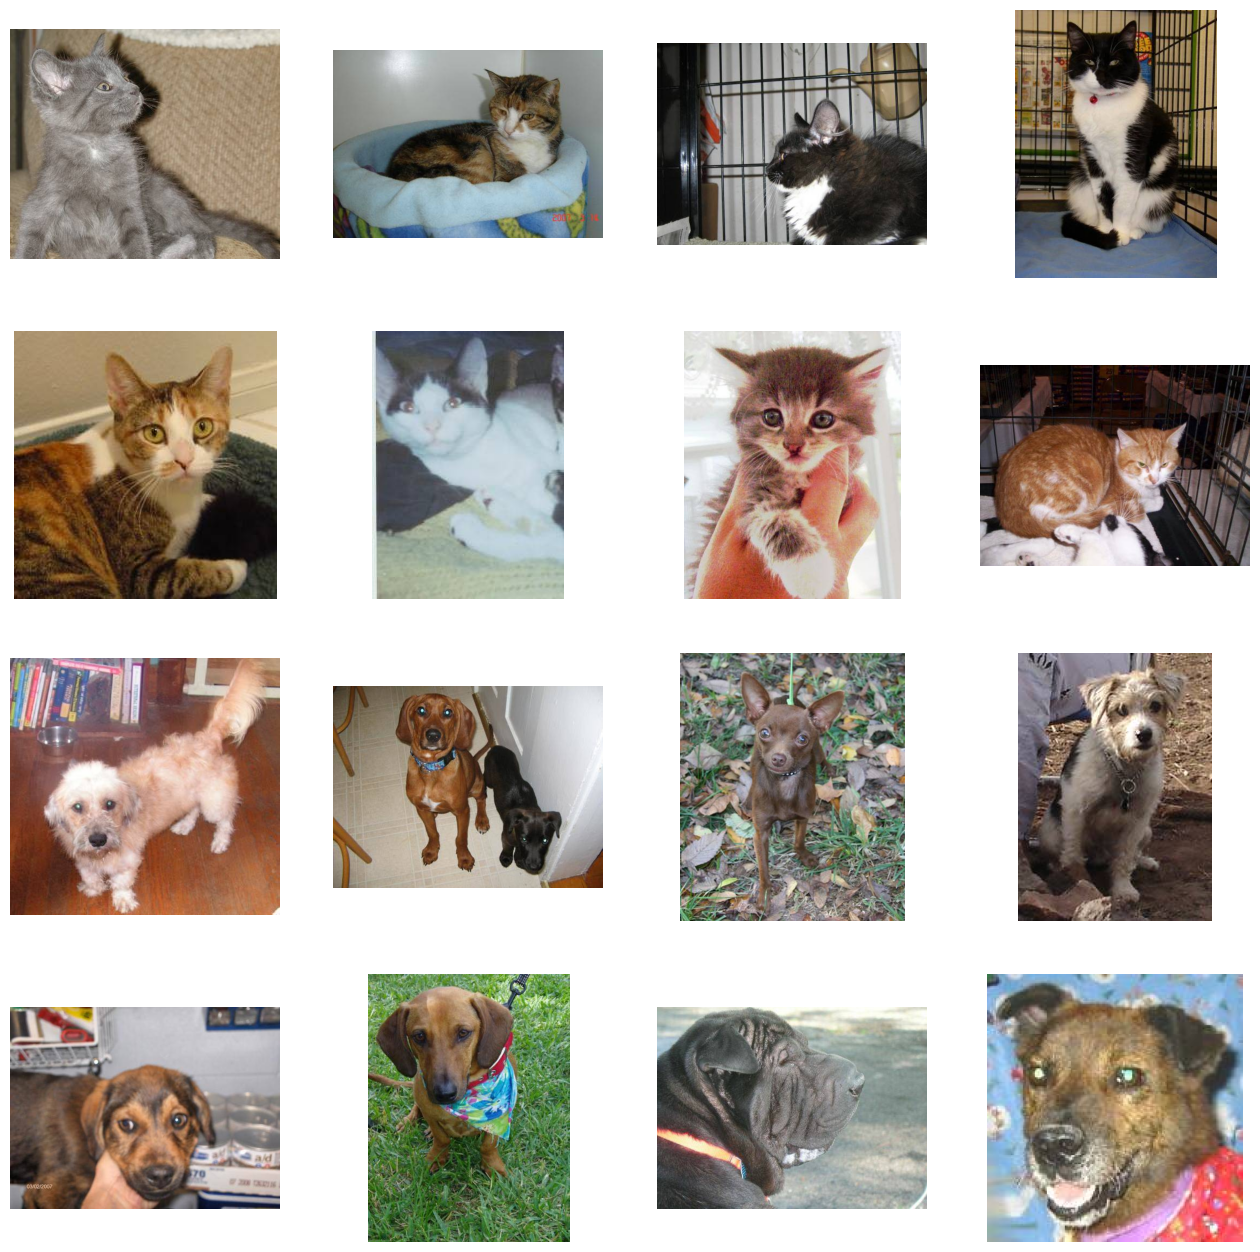

In [20]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname) # Get paths for cat images (8 images in total)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) # Get paths for dog images (8 images in total)
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  # set up subplot, subplot indices start with 1
  sp = plt.subplot(nrows, ncols, i + 1) # since i starts from 0
  sp.axis('Off') # do not show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)


plt.show()

- We have images in different shapes, so we do need to preprocess them to the same shape!

In [21]:
next_cat_pix

['cats_and_dogs_filtered/train/cats/cat.216.jpg',
 'cats_and_dogs_filtered/train/cats/cat.608.jpg',
 'cats_and_dogs_filtered/train/cats/cat.231.jpg',
 'cats_and_dogs_filtered/train/cats/cat.888.jpg',
 'cats_and_dogs_filtered/train/cats/cat.977.jpg',
 'cats_and_dogs_filtered/train/cats/cat.489.jpg',
 'cats_and_dogs_filtered/train/cats/cat.100.jpg',
 'cats_and_dogs_filtered/train/cats/cat.654.jpg']

In [24]:
mpimg.imread(next_cat_pix[1]).shape

(349, 499, 3)

# Small Neural Network Model

In [25]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # flatten the results to feed in a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # btw we can use units=2, activation='softmax'
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

In [28]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Data Preprocessing

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20, # 2000 images, 20 in each batch, 100 batches
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    batch_size=20, # 1000 images, 20 in each batch, 50 batches
                                                    class_mode='binary',
                                                    target_size=(150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Training

In [30]:
train_generator

In [31]:
history = model.fit(train_generator,
                    epochs=15, # 100 batches in each epochs(2000 images, 20img/batch)
                    validation_data=validation_generator,
                    verbose=2)

Epoch 1/15
100/100 - 17s - loss: 0.7115 - accuracy: 0.5305 - val_loss: 0.6740 - val_accuracy: 0.6790 - 17s/epoch - 166ms/step
Epoch 2/15
100/100 - 5s - loss: 0.6441 - accuracy: 0.6620 - val_loss: 0.6098 - val_accuracy: 0.6640 - 5s/epoch - 46ms/step
Epoch 3/15
100/100 - 5s - loss: 0.5901 - accuracy: 0.6835 - val_loss: 0.5547 - val_accuracy: 0.7180 - 5s/epoch - 46ms/step
Epoch 4/15
100/100 - 6s - loss: 0.5274 - accuracy: 0.7355 - val_loss: 0.5974 - val_accuracy: 0.6730 - 6s/epoch - 56ms/step
Epoch 5/15
100/100 - 5s - loss: 0.4702 - accuracy: 0.7800 - val_loss: 0.6432 - val_accuracy: 0.6800 - 5s/epoch - 46ms/step
Epoch 6/15
100/100 - 5s - loss: 0.4053 - accuracy: 0.8110 - val_loss: 0.5306 - val_accuracy: 0.7330 - 5s/epoch - 55ms/step
Epoch 7/15
100/100 - 5s - loss: 0.3306 - accuracy: 0.8510 - val_loss: 0.5898 - val_accuracy: 0.7170 - 5s/epoch - 45ms/step
Epoch 8/15
100/100 - 6s - loss: 0.2573 - accuracy: 0.8935 - val_loss: 0.6599 - val_accuracy: 0.7250 - 6s/epoch - 57ms/step
Epoch 9/15
10

# Model Prediction

In [32]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")


Saving image-53920-800.jpeg to image-53920-800.jpeg
1/1 [==============================] - 0s 187ms/step
[0.02401741]
image-53920-800.jpeg is a cat


# Visualizing Intermedate Representations
To get a feel for what kind of features your CNN has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the model.

You can pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

In [33]:
model.input

<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'conv2d_input')>

In [34]:
model.layers

In [38]:
?random.choice

In [40]:
random.choice(np.array([1,141,2,423,4]))

4

1/1 [==============================] - 0s 103ms/step


<ipython-input-41-e8cbc0ba32ac>:48: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


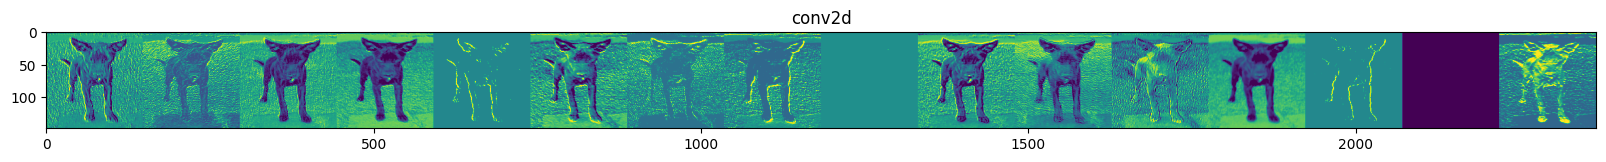

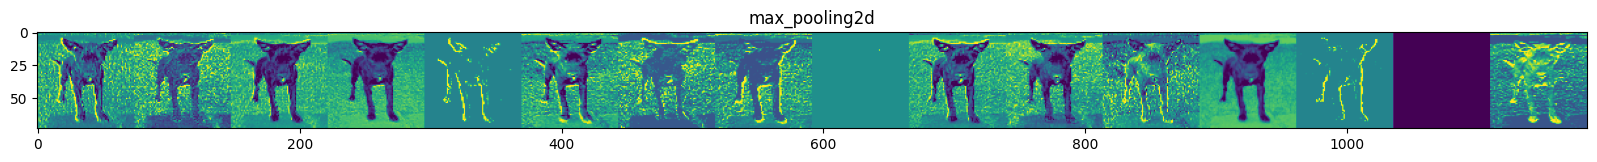

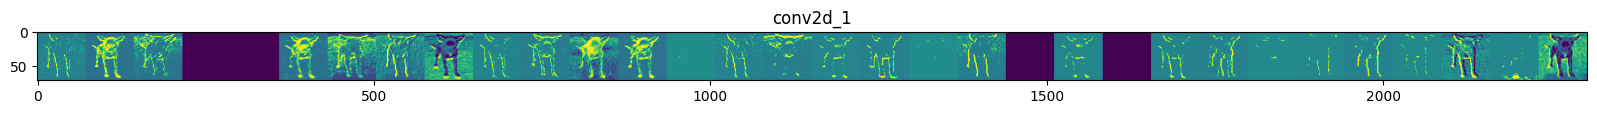

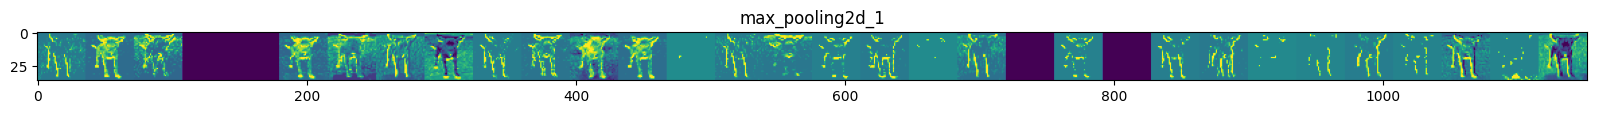

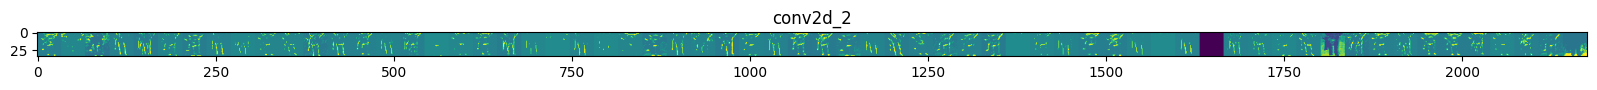

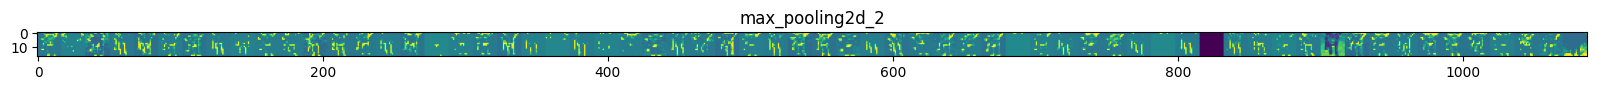

In [41]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files) # take a random iamge
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )


- 16 filters in conv2d
- 32 filters in conv2d_1
- 64 filters in conv2d_2

- The process of setting features to zero, and activating the most important/useful features (look at the bottom layer, we see only a few features) - is called **Representation Sparsity**.

# Evaluating Accuracy and Loss for the Model

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

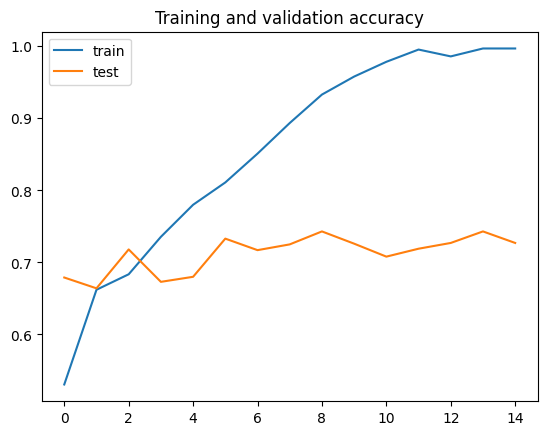

<Figure size 640x480 with 0 Axes>

In [53]:
plt.plot(epochs, acc, label='train')
plt.plot(epochs, val_acc, label='test')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure();

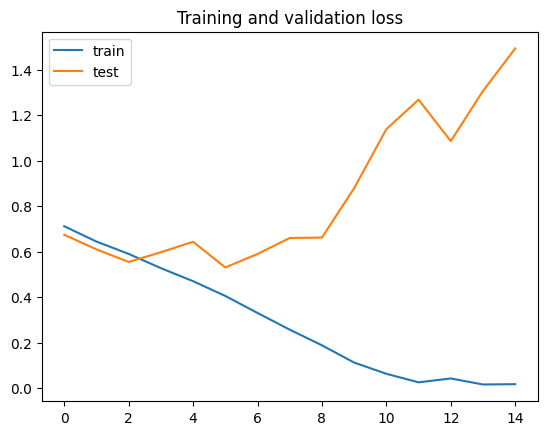

<Figure size 640x480 with 0 Axes>

In [54]:
plt.plot(epochs, loss, label='train')
plt.plot(epochs, val_loss, label='test')
plt.title('Training and validation loss')
plt.legend()
plt.figure();

The model is **overfitting**, since we have a very small dataset (2000 images).